# Task 1 - Problem Formulation, Data Acquisition, and Preparation

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statistics

# Read dataset and make into table, make header
data = pd.read_csv("/Users/chester/Documents/KMITL/Python/Robotics Lab/Semester II/Assignment 2/Algerian forest fires dataset.csv", sep = ",", header = 1, skipinitialspace=True)
df = pd.DataFrame(data)

# Checking missing value
for column_name, missing_value in df.isnull().sum().items():
    break
    print(column_name)
    print(missing_value)

# Change column name
df.rename(columns={"month": "Month", "year": "Year", " RH": "RH", " Ws": "Ws", "Rain ": "Rain", "Classes  ": "Classes"}, inplace=True)

# Replace value into nan
df["Month"] = df["Month"].replace("Month", np.nan)

# Use dropna to clean the missing value
df = df.dropna()
print(df.shape)

# Convert classes value
df["Classes"] = df["Classes"].map(lambda x: 0 if "not fire" in x else 1 if "fire" in x else np.nan)

# Use dropna to clean the missing value
df = df.dropna()
print(df.shape)

# Change data type
for col in ["Month", "Year", "Temperature", "RH", "Ws", "Rain", "FFMC", "DMC", "DC", "ISI", "BUI", "FWI"]:
    df[col] = df[col].astype(float).astype(int)

(244, 14)
(243, 14)


# Task 2 - Data Exploration

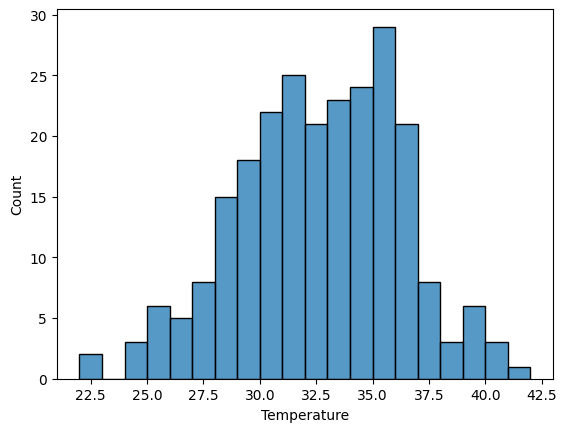

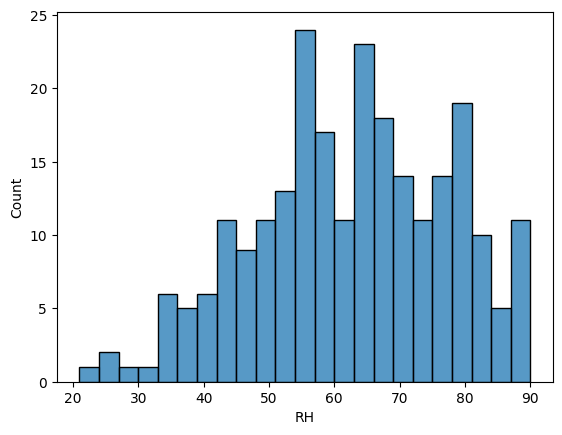

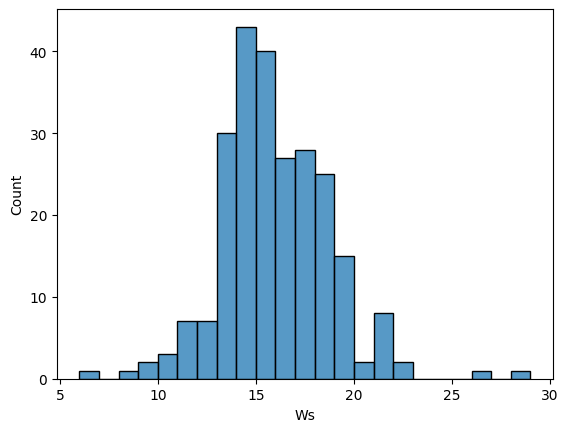

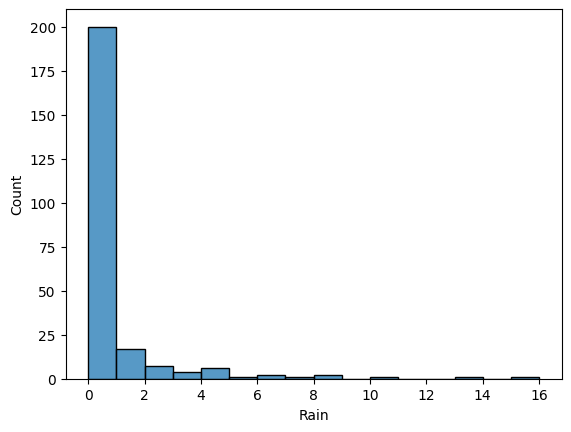

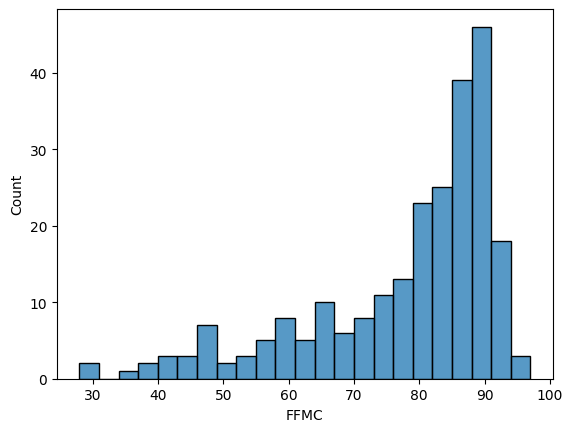

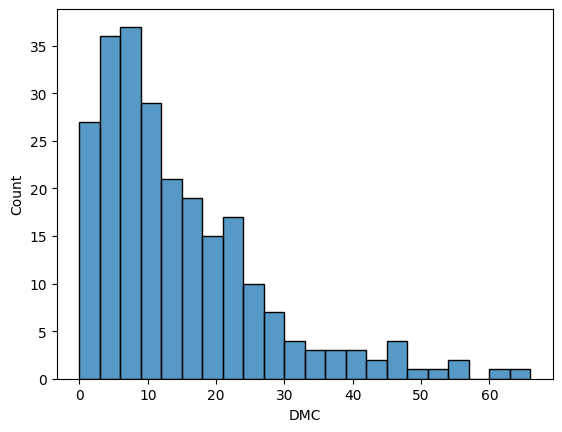

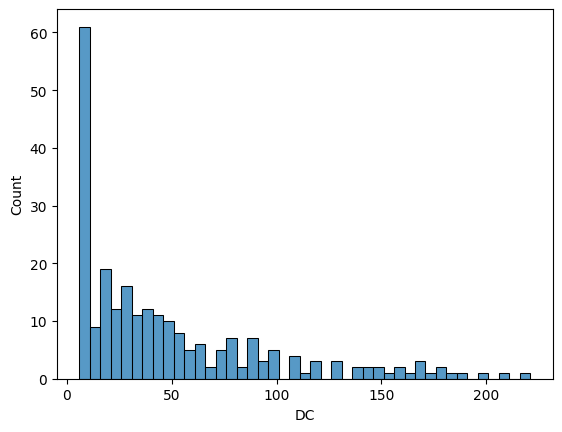

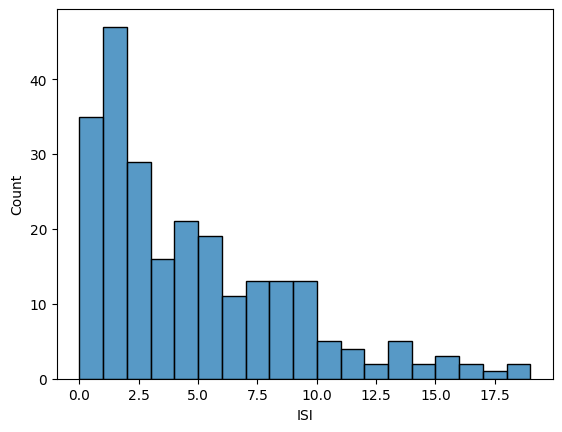

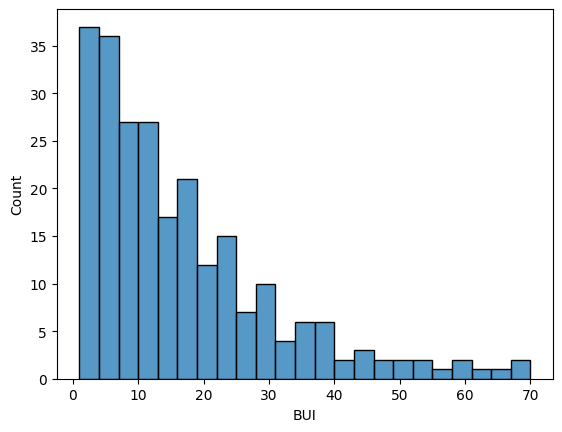

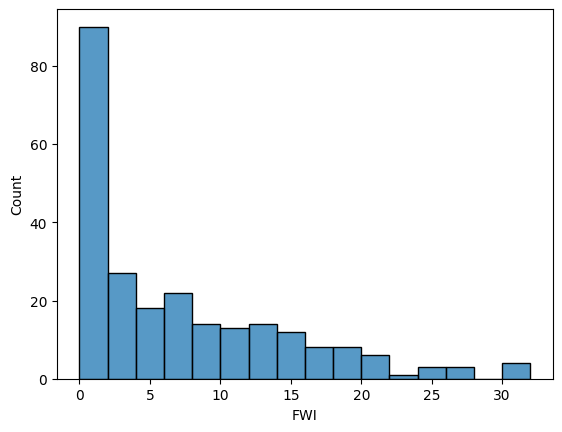

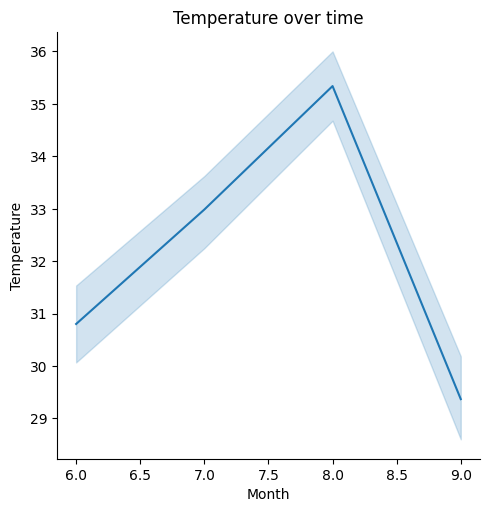

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 48.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 55.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 67.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 45.0% of the points cannot be placed; you may want to decrease the size of the markers or use s

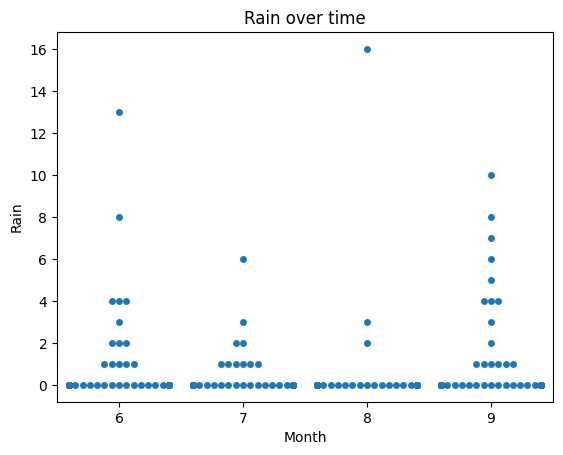

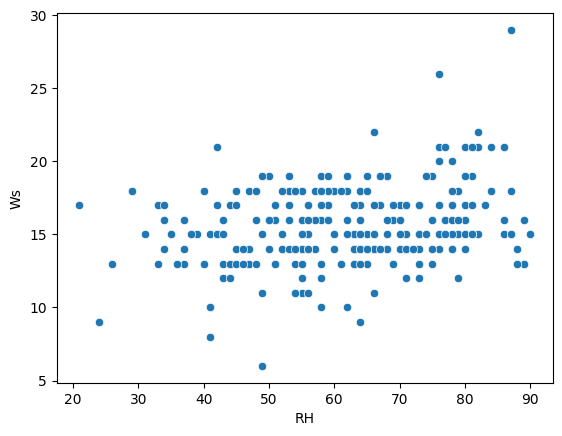

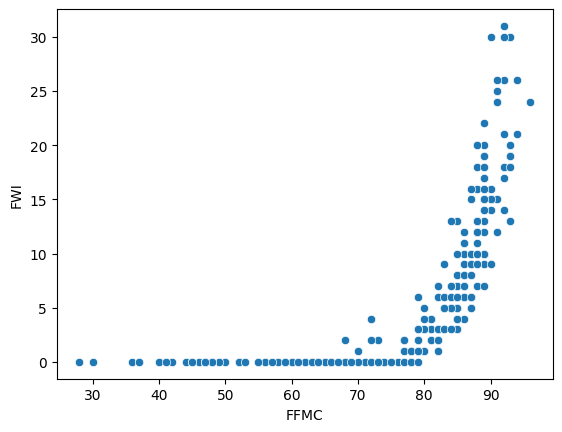

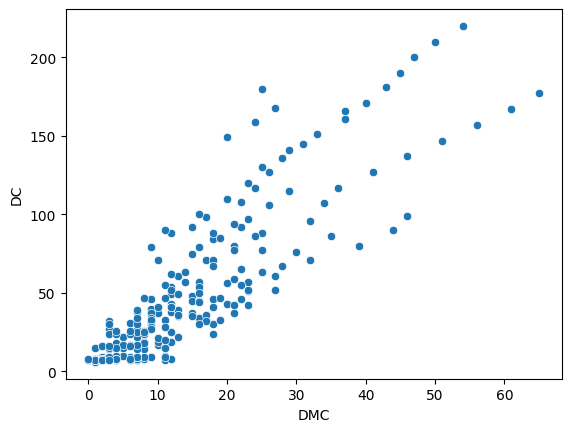

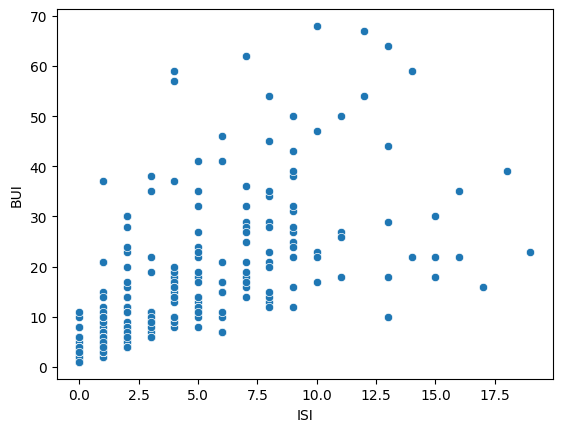

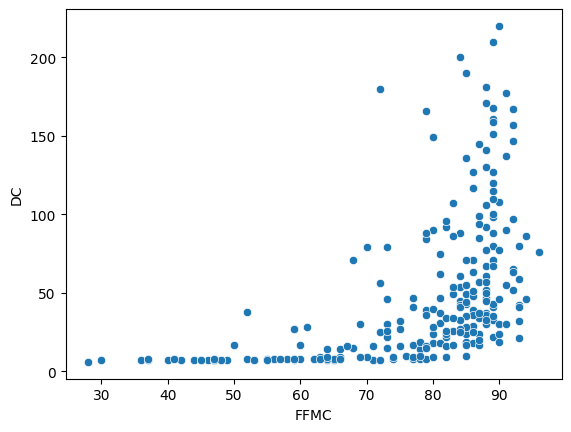

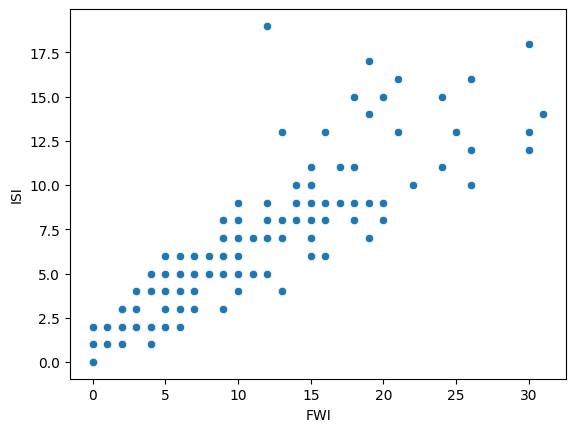

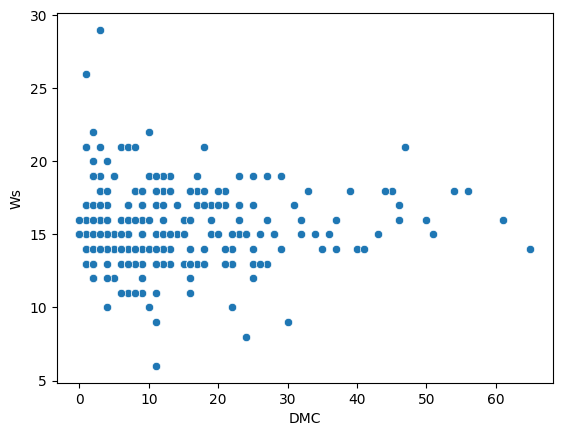

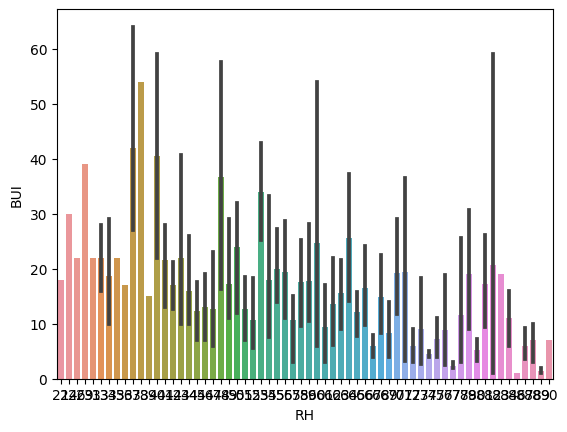

In [2]:
# Graphical visualizations
sns.histplot(data=df, x="Temperature", binwidth=1)
plt.show()

sns.histplot(data=df, x="RH", binwidth=3)
plt.show()

sns.histplot(data=df, x="Ws", binwidth=1)
plt.show()

sns.histplot(data=df, x="Rain", binwidth=1)
plt.show()

sns.histplot(data=df, x="FFMC", binwidth=3)
plt.show()

sns.histplot(data=df, x="DMC", binwidth=3)
plt.show()

sns.histplot(data=df, x="DC", binwidth=5)
plt.show()

sns.histplot(data=df, x="ISI", binwidth=1)
plt.show()

sns.histplot(data=df, x="BUI", binwidth=3)
plt.show()

sns.histplot(data=df, x="FWI", binwidth=2)
plt.show()

# Graphical visualizations (Paring)
# Paring between Month and Temperature
sns.relplot(x='Month', y='Temperature', kind='line', data=df)
plt.title('Temperature over time')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.show()

# Paring between Month and Rain
sns.swarmplot(data=df, x="Month", y="Rain")
plt.title('Rain over time')
plt.xlabel('Month')
plt.ylabel('Rain')
plt.show()

# Paring between RH and Ws
sns.scatterplot(data=df, x="RH", y="Ws")
plt.show()

# Paring between FFMC and FWI
sns.scatterplot(data=df, x="FFMC", y="FWI")
plt.show()

# Paring between DMC and DC
sns.scatterplot(data=df, x="DMC", y="DC")
plt.show()

# Paring between ISI and BUI
sns.scatterplot(data=df, x="ISI", y="BUI")
plt.show()

# Paring between FFMC and DC
sns.scatterplot(data=df, x="FFMC", y="DC")
plt.show()

# Paring between FWI and ISI
sns.scatterplot(data=df, x="FWI", y="ISI")
plt.show()

# Paring between DMC and Ws
sns.scatterplot(data=df, x="DMC", y="Ws")
plt.show()

# Paring between RH and BUI
sns.barplot(data=df, x="RH", y="BUI")
plt.show()

# Task 3 - Data Modelling

            Month    Year  Temperature          RH          Ws        Rain  \
count  243.000000   243.0   243.000000  243.000000  243.000000  243.000000   
mean     7.502058  2012.0    32.152263   62.041152   15.493827    0.600823   
std      1.114793     0.0     3.628039   14.828160    2.811385    1.915875   
min      6.000000  2012.0    22.000000   21.000000    6.000000    0.000000   
25%      7.000000  2012.0    30.000000   52.500000   14.000000    0.000000   
50%      8.000000  2012.0    32.000000   63.000000   15.000000    0.000000   
75%      8.000000  2012.0    35.000000   73.500000   17.000000    0.000000   
max      9.000000  2012.0    42.000000   90.000000   29.000000   16.000000   

             FFMC         DMC          DC         ISI         BUI         FWI  \
count  243.000000  243.000000  243.000000  243.000000  243.000000  243.000000   
mean    77.403292   14.209877   49.020576    4.329218   16.222222    6.600823   
std     14.370033   12.391062   47.679582    4.141936 

/var/folders/l9/d7hch3911319149ft_vpsdzc0000gn/T/ipykernel_67642/653753914.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correl = df.corr()


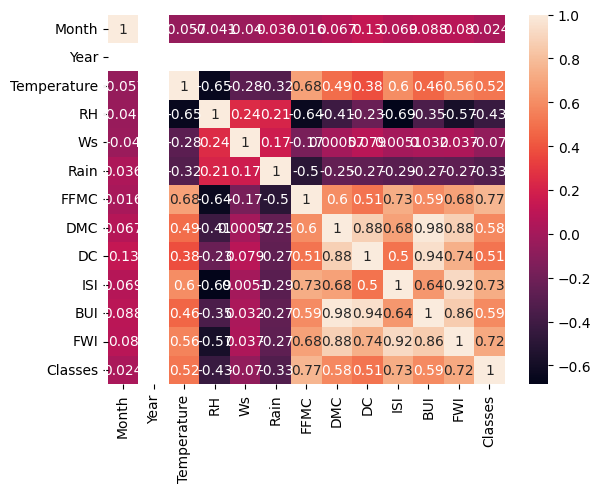

Accuracy: 91.78082191780823%


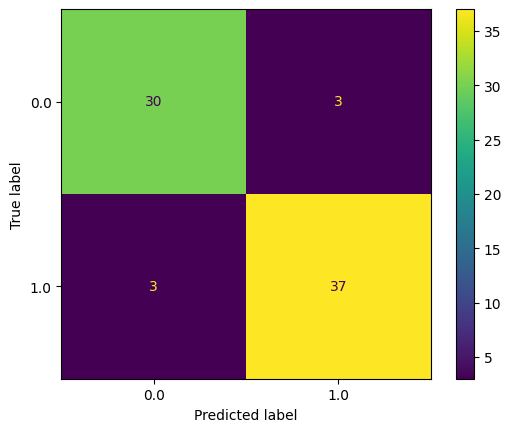




Model 1 : LogisticRegression

>>Suite 1 : Train size = 0.5 , Test size = 0.5
Confusion Matrix:
[[51  1]
 [ 2 68]]
Accuracy: 0.9754098360655737
Precision: 0.9855072463768116
Recall: 0.9714285714285714
F1 Score: 0.9784172661870504

>>Suite 2 : Train size = 0.6 , Test size = 0.4
Confusion Matrix:
[[42  2]
 [ 1 53]]
Accuracy: 0.9693877551020408
Precision: 0.9636363636363636
Recall: 0.9814814814814815
F1 Score: 0.9724770642201834

>>Suite 3 : Train size = 0.8 , Test size = 0.2
Confusion Matrix:
[[22  0]
 [ 1 26]]
Accuracy: 0.9795918367346939
Precision: 1.0
Recall: 0.9629629629629629
F1 Score: 0.9811320754716981



Model 2 : RandomForestClassifier

>>Suite 1 : Train size = 0.5 , Test size = 0.5
Confusion Matrix:
[[52  0]
 [ 1 69]]
Accuracy: 0.9918032786885246
Precision: 1.0
Recall: 0.9857142857142858
F1 Score: 0.9928057553956835

>>Suite 2 : Train size = 0.6 , Test size = 0.4
Confusion Matrix:
[[44  0]
 [ 0 54]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

>>Suite 3 : Train siz

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder

# To show the statistic of the data
print(df.describe())

correl = df.corr()
axis_corr = sns.heatmap(correl, annot=True)
plt.show()

# Selected the features by they have the high correlation to `DMC` at 0.88.
features = ["FWI", "DC"]

# Train dataset by letting x be the values from column of features and y be the values from column `DMC`.
x = df[features]
y = df["Classes"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

# Normalize input data
means = np.mean(x_train, axis=0)
stds = np.std(x_train, axis=0)

x_train = (x_train - means) / stds
x_test = (x_test - means) / stds

# Fit the train data using Logistic Regression model.
model = LogisticRegression()
model.fit(x_train, y_train)

# Get predicted y from `x_test`
y_pred = model.predict(x_test)

# Print accuracy of model
model_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {model_accuracy * 100}%")

# Plot Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

X = df.drop('DC', axis = 1)
y = df['Classes']

#Define a function to evaluate the model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_test_pred)
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    return conf_matrix, accuracy, precision, recall, f1

#Perform the steps for each model and each suite
models = [LogisticRegression(max_iter = 1000), RandomForestClassifier()]
suites = [(0.5, 0.5), (0.6, 0.4), (0.8, 0.2)]

for i, model in enumerate(models):
    print("\n\n\nModel", i+1, ":", type(model).__name__)
    for j, (train_size, test_size) in enumerate(suites):
        print("\n>>Suite", j+1, ": Train size =", train_size, ", Test size =", test_size)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = 42)
        conf_matrix, accuracy, precision, recall, f1 = evaluate_model(model, X_train, X_test, y_train, y_test)
        print("Confusion Matrix:")
        print(conf_matrix)
        print("Accuracy:", accuracy)
        print("Precision:", precision)
        print("Recall:", recall)
        print("F1 Score:", f1)

# References
1) https://chat.openai.com/chat
2) https://seaborn.pydata.org/generated/seaborn.countplot.html

# Assissant
1) PATCHARA
2) ChatGPT